Noisy Data Generation for NN Training
=====================================

This example demonstrates how to generate noisy image data for
training neural network models for denoising. The original images are
part of the
[BSDS500 dataset](http://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/)
provided by the Berkeley Segmentation Dataset and Benchmark project.

In [1]:
import numpy as np

from scico import plot
from scico.flax.examples import load_image_data
plot.config_notebook_plotting()

Read data from cache or generate if not available.

In [2]:
size = 40  # patch size
train_nimg = 400  # number of training images
test_nimg = 64  # number of testing images
nimg = train_nimg + test_nimg
gray = True  # use gray scale images
data_mode = "dn"  # Denoising problem
noise_level = 0.1  # Standard deviation of noise
noise_range = False  # Use fixed noise level
stride = 23  # Stride to sample multiple patches from each image

train_ds, test_ds = load_image_data(
    train_nimg,
    test_nimg,
    size,
    gray,
    data_mode,
    verbose=True,
    noise_level=noise_level,
    noise_range=noise_range,
    stride=stride,
)

Download complete
Extracting content from tar file BSR_bsds500.tgz
Read 400 images for training
Read 100 images for testing
Saving as ~/.cache/scico/examples/data/BSDS/bsds500.npz
Storing data in path      :   ~/.cache/scico/examples/data
Set --training--          :   Size:   104000
Set --testing --          :   Size:   16640
Data range -- images --   :    Min:   0.00, Max: 1.00
Data range -- labels --   :    Min:   0.00, Max: 1.00


Plot randomly selected sample. Note that patches have small sizes, thus,
plots may correspond to unidentifiable fragments.

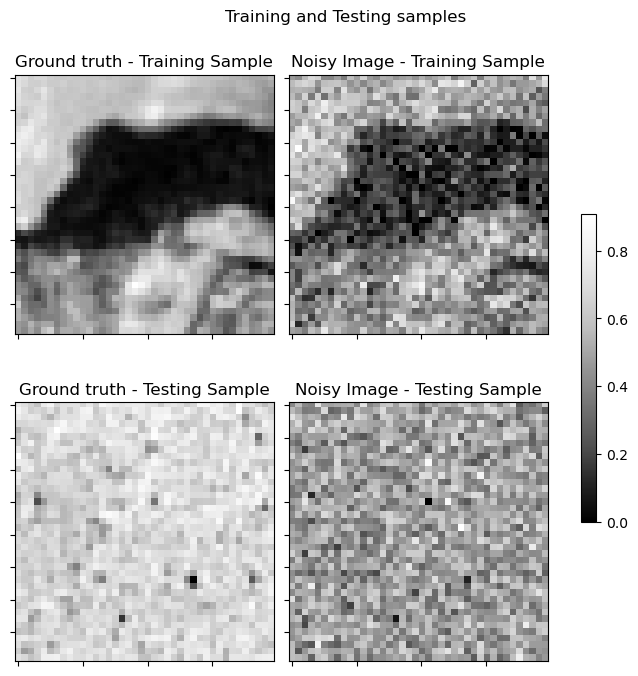

In [3]:
indx_tr = np.random.randint(0, train_nimg)
indx_te = np.random.randint(0, test_nimg)
fig, axes = plot.subplots(nrows=2, ncols=2, figsize=(7, 7))
plot.imview(
    train_ds["label"][indx_tr, ..., 0],
    title="Ground truth - Training Sample",
    fig=fig,
    ax=axes[0, 0],
)
plot.imview(
    train_ds["image"][indx_tr, ..., 0],
    title="Noisy Image - Training Sample",
    fig=fig,
    ax=axes[0, 1],
)
plot.imview(
    test_ds["label"][indx_te, ..., 0],
    title="Ground truth - Testing Sample",
    fig=fig,
    ax=axes[1, 0],
)
plot.imview(
    test_ds["image"][indx_te, ..., 0], title="Noisy Image - Testing Sample", fig=fig, ax=axes[1, 1]
)
fig.suptitle(r"Training and Testing samples")
fig.tight_layout()
fig.colorbar(
    axes[0, 1].get_images()[0],
    ax=axes,
    shrink=0.5,
    pad=0.05,
)
fig.show()